As license plates are considered personal data in Europe, in this notebook anonymised images are used for displaying the results

In [1]:
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
from PIL import Image

/Users/ptsilva/.pyenv/versions/venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/ptsilva/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-6 Python-3.7.10 torch-1.13.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
!ls

01 Grab video frames.ipynb             main.py
02 Image crop.ipynb                    para_anotar
03 Yolo v5 prediction.ipynb            project-1-at-2022-11-01-21-19-8f701fe1
PoC Select useful frames.ipynb         raw
Untitled.ipynb                         safe
frames                                 yolov5
frames original                        yolov5s.pt
lixo.png


In [4]:
img_path = 'data/frames/train/IMG_1751.MOV_1160.png'
safe_img_path = 'data/safe/IMG_1751.MOV_1160.jpg'
# 'frames original/validate/IMG_1740.MOV_0.png'

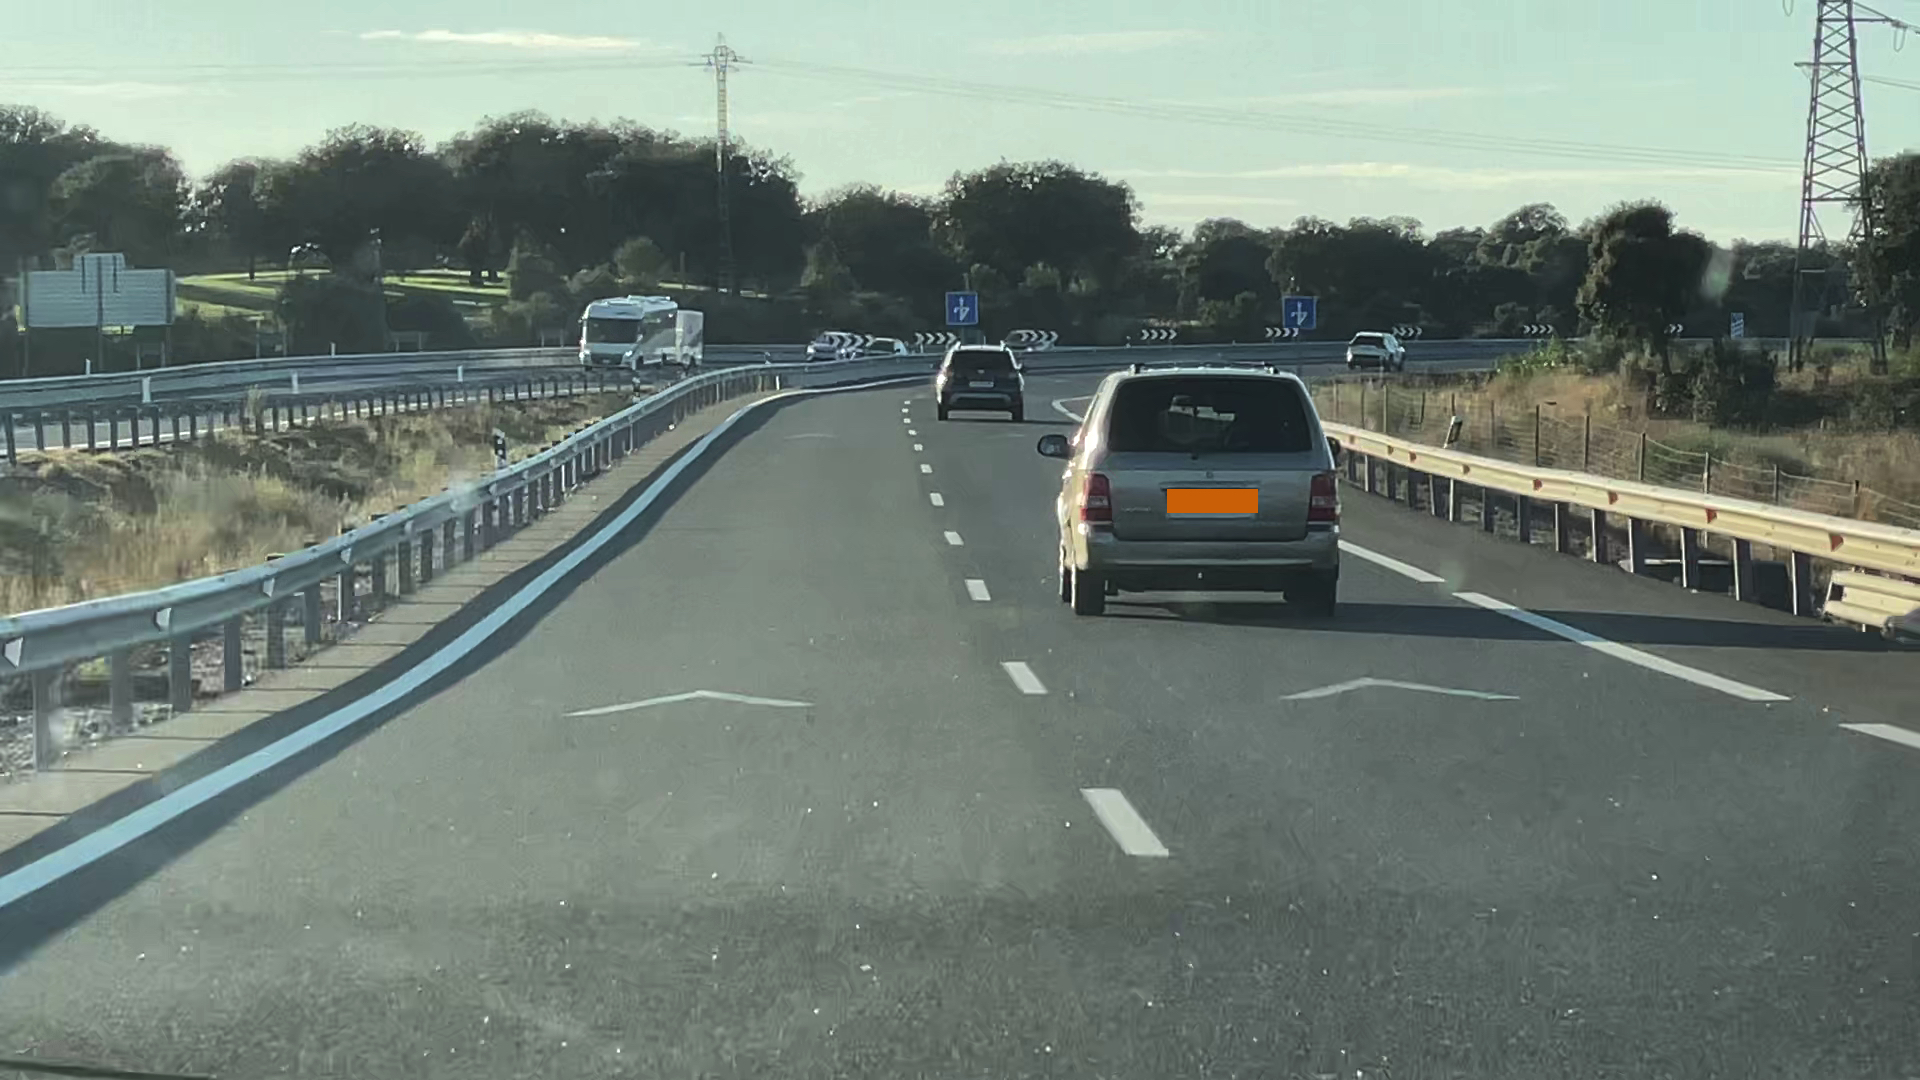

In [5]:
im = Image.open(img_path)
safe_img = Image.open(safe_img_path)
safe_img

In [6]:
results = model(im)

In [7]:
results.print()

image 1/1: 1080x1920 5 cars, 1 truck
Speed: 84.1ms pre-process, 213.4ms inference, 1.6ms NMS per image at shape (1, 3, 384, 640)


In [8]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 1080x1920 5 cars, 1 truck
Speed: 84.1ms pre-process, 213.4ms inference, 1.6ms NMS per image at shape (1, 3, 384, 640)

In [9]:
df = results.pandas().xyxy[0]
df

xmin        ymin         xmax        ymax  confidence  class   name
0  1049.058594  368.625183  1341.070435  620.749329    0.915728      2    car
1   933.951477  344.934540  1026.110840  421.966003    0.841226      2    car
2   810.004028  333.795044   859.202820  362.221527    0.519781      2    car
3  1345.356323  329.585266  1405.628906  371.862671    0.490177      2    car
4   576.088928  295.091064   685.638245  376.662170    0.483285      7  truck
5  1139.552734  322.367676  1177.895386  342.161926    0.257816      2    car

In [10]:
bboxes = df.loc[:, ['xmin', 'ymin', 'xmax', 'ymax']].values.astype(int).tolist()
bboxes

[[1049, 368, 1341, 620],
 [933, 344, 1026, 421],
 [810, 333, 859, 362],
 [1345, 329, 1405, 371],
 [576, 295, 685, 376],
 [1139, 322, 1177, 342]]

In [11]:
labels = df['name'].to_list()
labels

['car', 'car', 'car', 'car', 'truck', 'car']

In [12]:
# COCO vehicle categories: bicycle, car, motorcycle, airplane, bus, train, truck, boat
obj_color = {'car':(255,0,0),
             'truck':(0,0,255),
             'bus':(0,255,0)}

In [13]:
colors = [obj_color[i] for i in labels]
colors

[(255, 0, 0), (255, 0, 0), (255, 0, 0), (255, 0, 0), (0, 0, 255), (255, 0, 0)]

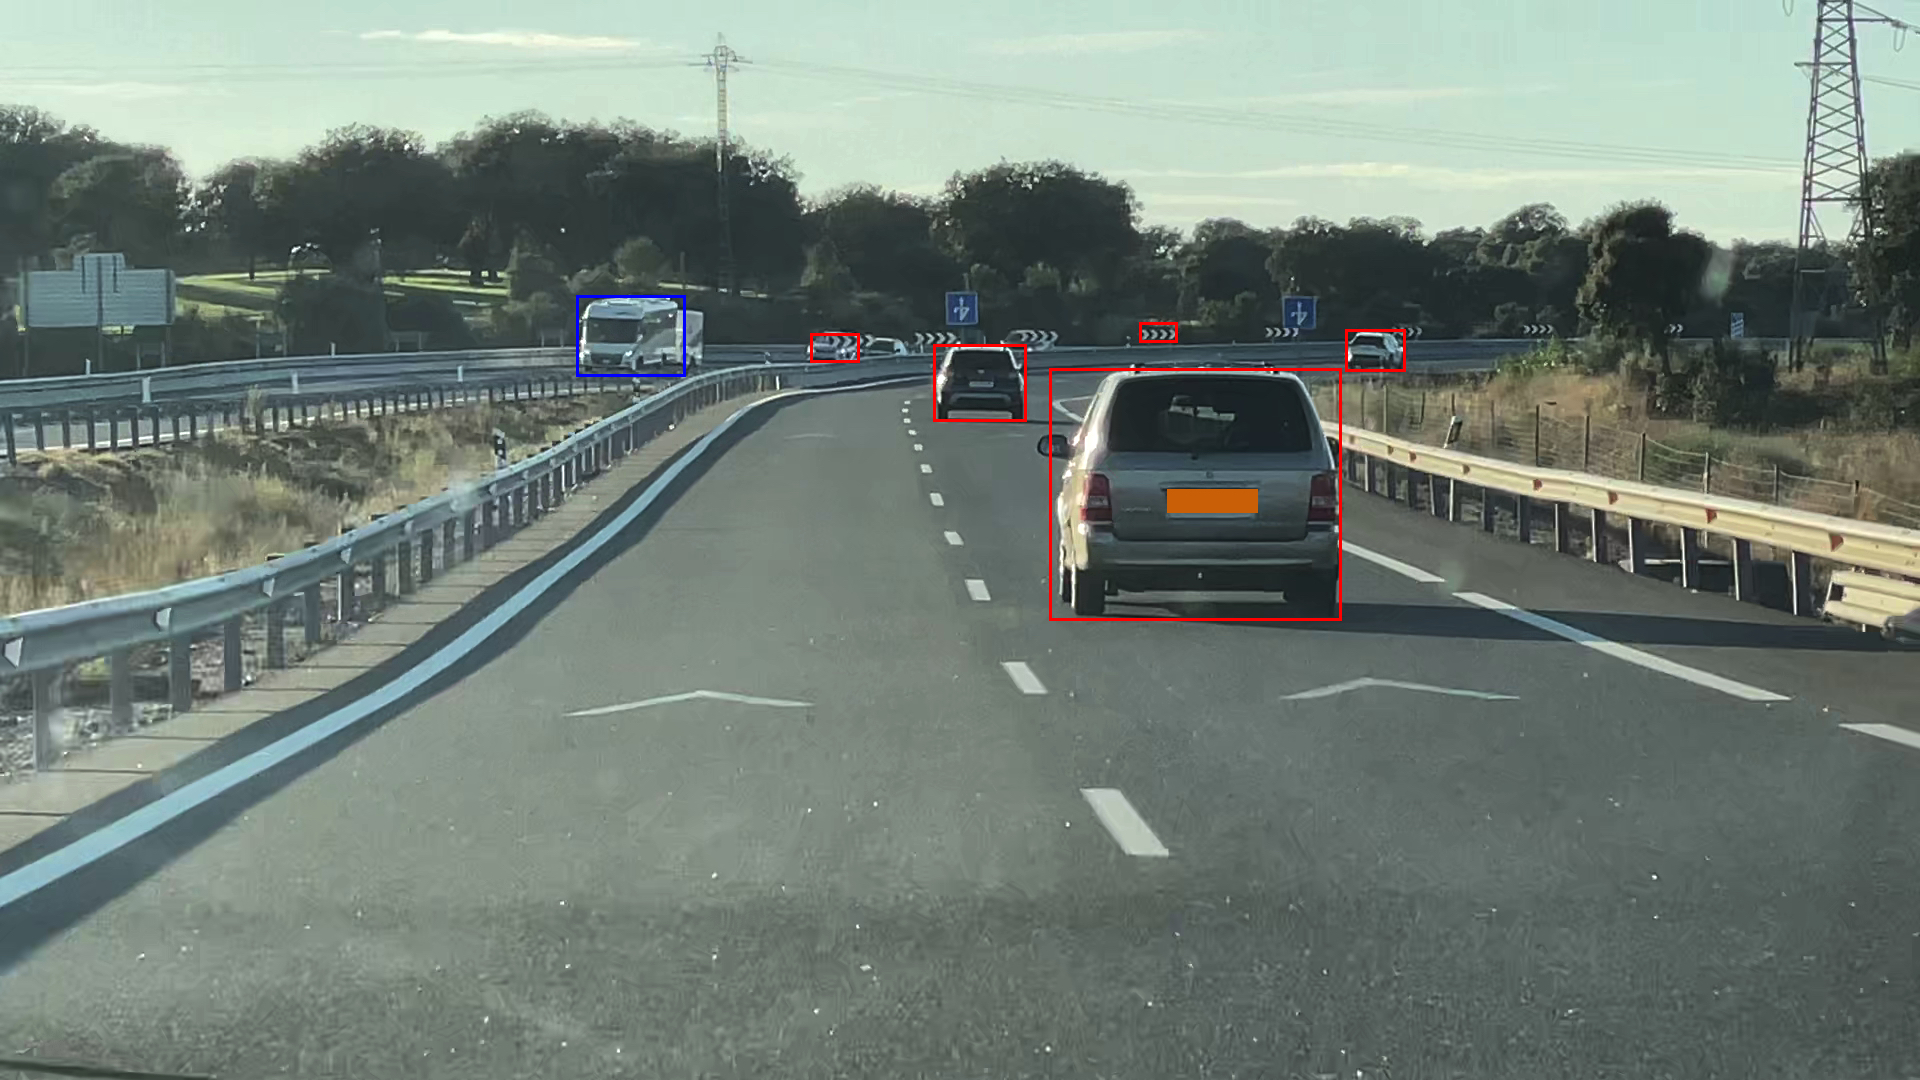

In [14]:
img = read_image(safe_img_path)

bbox = torch.tensor(bboxes, dtype=torch.int)
img=draw_bounding_boxes(img, bbox, width=3, colors=colors)
img = torchvision.transforms.ToPILImage()(img)
img

In COCO license plates are not considered objects, and therefore YOLOv5 out of the box does not detect them.

Aditionally, the model is not very goot at predicting vehicles.

For these reasons we must train with a dedicated dataset, where license plates are labelled and a significant number of vehicles are present.